## Hands-on implementation of K-Means clustering

In this notebook, we are going to apply this algorithm to real-world datasets. Here our task is to identify the clusters or types of flowers from the given features of the flowers. For this task, we are using the famous iris flower dataset which has four different features of iris flowers and from those features, we need to club those data points which belong to a particular type of flower.  

#### Load and read the data

First of all, we will load the data stored in a CSV file using pandas.

In [1]:
# Load the pandas
import pandas as pd

# Read the data
data = pd.read_csv('Iris.csv')

Review the first 5 rows of the dataset.

In [2]:
# Visualize the samples
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let’s quickly check the shape of the data frame.

In [3]:
# Check the shape of the data
data.shape

(150, 6)

#### Defining input features

We are using a dataset that holds the label for each instance, here as we are dealing with the unsupervised problem we will keep only sepal and petal information of the flowers and the rest will be excluded. 

In [4]:
# Defining input (X) features
X = data.iloc[:,1:5].values

Let’s ensure that we have extracted only those 4 features with all rows. 

In [5]:
# Size of X
X.shape

(150, 4)

Now we will create a separate training and testing set of the above-defined data. This step is optional, we can use only one set of data to train the algorithm and generate the predictions. The below train and test sets are used for training and to obtain predictions respectively.  

In [6]:
# Preparing training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(X,test_size=0.20, random_state=0)

Checking the shape of the training and testing set.

In [7]:
# Shape for train and test set
x_train.shape, x_test.shape

((120, 4), (30, 4))

Before moving further let's check the input patterns.

In [8]:
# Input patterns
x_test[:11]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4]])

#### Initializing and training the K-Means Clustering 

Same as any other ML algorithm, here we import k-means from the sklearn library. To train this algorithm we need to give the value for k which is the number of clusters to be identified. To find the optimal value for k here we will use the Elbow method. 

The Elbow method is popularly used in algorithm K-means algorithm to find the optimal number of clusters to be formed. In K-means, we will create a loop for a certain range of values, for each iteration we train the algorithm and will extract the sum of squared error within the clusters. 

After all the iterations we will simply make a line plot for the Sum of Squared error Vs Value of K and based on the plot we will choose the optimal value of K.

The elbow method can be implemented as below. 

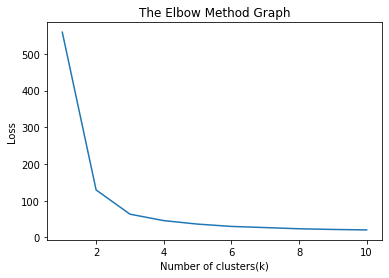

In [9]:
# elbow method to get value of k
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

loss= []   
  
# Using a for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i)  
    kmeans.fit(x_train)  
    loss.append(kmeans.inertia_)  
plt.plot(range(1, 11), loss)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('Loss')  
plt.show()

In the above graph, the elbow point is at K=3, so we can choose it as the final value. Now we can train the algorithm.

In [10]:
# Training with K=3
kmeans = KMeans(n_clusters=3)  
kmeans.fit(x_train) 

KMeans(n_clusters=3)

#### Predicting and visualizing the clusters

As we have chosen the value of k to be 3, the prediction for the given data points will be in form of numeric labels such as 0,1,2.  

In [11]:
# Random prediction 
kmeans.predict([[7.3, 2.9, 6.3, 1.8]])

array([0])

Above we have supplied random values and the model predicted, identified that these points belong to cluster number 0. In a similar way, we get predictions for test data.

In [12]:
# Predict clusters
y_predict = kmeans.predict(x_test)
y_predict

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1])

Above we can see that the model has predicted cluster numbers for test records. Now we are going to visualize these identified clusters using a scatter plot. We have trained the algorithm for 4 features, in the scatter plot we will make use of 2 features namely Sepal length and Petal length to visualize the cluster.   

The algorithm also returns the clusters’ centroid; we will plot those too to highlight the centre point of the respective cluster.   

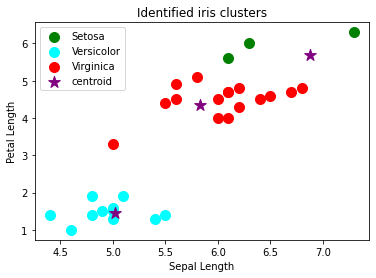

In [13]:
# Get the cluster centers
centres = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(x_test[y_predict == 0, 0], x_test[y_predict == 0, 2], s = 100, c = 'green', label = 'Setosa')
plt.scatter(x_test[y_predict == 1, 0], x_test[y_predict == 1, 2], s = 100, c = 'cyan', label = 'Versicolor')
plt.scatter(x_test[y_predict == 2, 0], x_test[y_predict == 2, 2], s = 100, c = 'red', label = 'Virginica')
plt.scatter(centres[:,0],centres[:,2],c='purple',s=150, marker='*', label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Identified iris clusters')
plt.legend()

As we can see the above plot shows the 3 clusters clearly and their respective centroid highlighted in the Purple star. From the above plot, some points can be inferred such as the data points that have higher Sepal length and Petal length are clubbed into 3rd cluster similarly smaller lengths are clubbed into 1st cluster. 

So this is how we can implement the K-means clustering algorithm for unsupervised learning. 